# Lab 2: Data Preparation

In the exploration of the *bank* dataset, we discovered a few issues, which need to be resolved before the dataset is ready for machine learning (ML). This exercise is typically referred as either *data preparation*, or *data preprocessing*, or *data munging*, or *data wrangling*. 

Here are the problems, we are already aware of:

- There are missing values in some columns. We can estimate these values depending on the number of missing values and the expected importance of the column.

- We observed that `ApplicantIncome` and `LoanAmount` seem to contain extreme values at either end. Although they might make intuitive sense, they should be treated appropriately.

## Etivity 2 - prepare bank.csv for machine learning.

Ensure that you have:

- 1 encoded all categorical attributes as numerical,
- 2 filled in all missing values
- 3 applied a scaler to rescale features
- 4 treated outliers appropriately
- 5 created at least one new feature from the existing ones

Shortly describe and Justify the data preparation choices you have taken in markdown cells. Aim at not having markdown cells longer than 2-3 lines of text.

In the end, save the prepared dataset as a CSV file on your hard disk.

## Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

Print statistical summary for all numerical attributes

In [2]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Check for missing values.

In [3]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Before we start transforming the dataset let's make a copy of it.

In [4]:
df_original = df

## 1. Process and Encode the Categorical Features

In [5]:
# Create a mapper

scale_mapper_bin = {
    "no": 0,
    "yes": 1,
    "unknown": 2
}

scale_mapper_true_bin = {
    "no": 0,
    "yes": 1
}

scale_mapper_mon = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}


df['default'] = df['default'].replace(scale_mapper_bin)
df['housing'] = df['housing'].replace(scale_mapper_bin)
df['loan'] = df['loan'].replace(scale_mapper_bin)

df['subscribed'] = df['subscribed'].replace(scale_mapper_true_bin)

df['month'] = df['month'].replace(scale_mapper_mon)

df.tail()

age           job  marital  education  default  balance  housing  loan  \
1995  20.0       student   single        NaN        0     2785        0     0   
1996  28.0        admin.   single  secondary        0      127        0     0   
1997  81.0       retired  married    primary        0     1154        0     0   
1998  46.0      services  married    primary        0     4343        1     0   
1999  40.0  entrepreneur  married  secondary        0     6403        0     0   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      9       327         2     -1         0      NaN   
1996   cellular   16      9      1334         2     -1         0      NaN   
1997  telephone   17      9       231         1     -1         0      NaN   
1998        NaN   20      9       185         1     -1         0      NaN   
1999   cellular   22      9       208         2     -1         0      NaN   

      subscribed  
1995           1  
1996           1  
1997           1  
1998           1  
1999           1

I've encoded binary valued no = 0 and yes =1, for the input attributes, there is a third option uknonw =2, but for the output attribute there is only two, so I created two scalar maps, one for binary woth a third unknown option, and one for true binary

I think it might be better to encode the months as 1 to 12, instead of using One-Hot encoding

In [6]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'marital', 'education','contact'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

age  default  balance  housing  loan  day  month  duration  campaign  \
1995  20.0        0     2785        0     0   16      9       327         2   
1996  28.0        0      127        0     0   16      9      1334         2   
1997  81.0        0     1154        0     0   17      9       231         1   
1998  46.0        0     4343        1     0   20      9       185         1   
1999  40.0        0     6403        0     0   22      9       208         2   

      pdays  ...  job_unemployed job_nan  marital_married  marital_single  \
1995     -1  ...               0       0                0               1   
1996     -1  ...               0       0                0               1   
1997     -1  ...               0       0                1               0   
1998     -1  ...               0       0                1               0   
1999     -1  ...               0       0                1               0   

      marital_nan  education_secondary  education_tertiary  education_nan  \
1995            0                    0                   0              1   
1996            0                    1                   0              0   
1997            0                    0                   0              0   
1998            0                    0                   0              0   
1999            0                    1                   0              0   

      contact_telephone  contact_nan  
1995                  0            0  
1996                  0            0  
1997                  1            0  
1998                  0            1  
1999                  0            0  

[5 rows x 32 columns]

NOTE: re-run whole notebook each time!!

In [7]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

age  default  balance  housing  loan  day  month  duration  campaign  \
0  32.0        0      392        1     0    1      4       957         2   
1  39.0        0      688        1     1    1      4       233         2   
2  59.0        0     1035        1     1    1      4       126         2   
3  47.0        0      398        1     1    1      4       274         1   
4  54.0        0     1004        1     0    1      4       479         1   

   pdays  ...  marital_married  marital_single  marital_nan  \
0    131  ...                0               1            0   
1    133  ...                0               0            0   
2    239  ...                1               0            0   
3    238  ...                1               0            0   
4    307  ...                1               0            0   

   education_secondary  education_tertiary  education_nan  contact_telephone  \
0                    0                   1              0                  0   
1                    1                   0              0                  0   
2                    1                   0              0                  0   
3                    1                   0              0                  0   
4                    1                   0              0                  0   

   contact_nan  poutcome_other  poutcome_success  
0            0               0                 0  
1            0               0                 0  
2            0               0                 0  
3            0               0                 0  
4            0               0                 0  

[5 rows x 33 columns]

In [8]:
df.tail()

age  default  balance  housing  loan  day  month  duration  campaign  \
1995  20.0        0     2785        0     0   16      9       327         2   
1996  28.0        0      127        0     0   16      9      1334         2   
1997  81.0        0     1154        0     0   17      9       231         1   
1998  46.0        0     4343        1     0   20      9       185         1   
1999  40.0        0     6403        0     0   22      9       208         2   

      pdays  ...  marital_married  marital_single  marital_nan  \
1995     -1  ...                0               1            0   
1996     -1  ...                0               1            0   
1997     -1  ...                1               0            0   
1998     -1  ...                1               0            0   
1999     -1  ...                1               0            0   

      education_secondary  education_tertiary  education_nan  \
1995                    0                   0              1   
1996                    1                   0              0   
1997                    0                   0              0   
1998                    0                   0              0   
1999                    1                   0              0   

      contact_telephone  contact_nan  poutcome_other  poutcome_success  
1995                  0            0               0                 0  
1996                  0            0               0                 0  
1997                  1            0               0                 0  
1998                  0            1               0                 0  
1999                  0            0               0                 0  

[5 rows x 33 columns]

## 2. Treatment of Missing Values in Numerical Columns

### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [9]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                    12
default                 0
balance                 0
housing                 0
loan                    0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
subscribed              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
marital_married         0
marital_single          0
marital_nan             0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
dtype: int64

### Impute Missing Values

There are numerous ways to impute (i.e., fill in) the missing values in a numerical column, e.g. column `age` – the simplest being replacement by mean, which can be done with the following code:

```pyton
df['age'].fillna(df['age'].mean(), inplace=True)
```

Imputing missing values with the mean (alternatively, the media, the most frequent, or a constant) may introduce bias in the dataset. A better method is to build an ML model (typically, kNN) to predict `age` on the basis of other columns.

Since, the purpose now is to practice data munging prior applying ML algorithms, we can take an approach, which lies somewhere in between these 2 extremes. We may hypothesise that attributes `education` and `job` combined can give a good estimate of `age`.

First, let us look at the following boxplots to see if a trend exists:

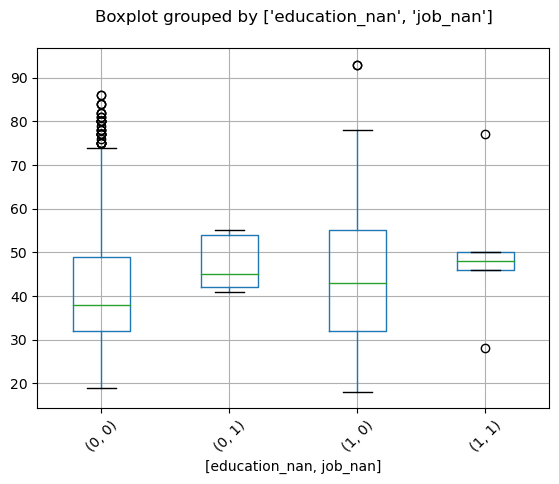

In [10]:
df.boxplot(column='age', by=['education_nan','job_nan'], rot=45)
plt.title("")
plt.show()

A job and an education, and no education and a job seem to span the most amount of ages, though the median age is between 40 and 50 for all but both a job and an education

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

In [11]:
ptable = df.pivot_table(values='age', 
                        index='job_nan',
                        columns='education_nan',  
                        aggfunc=np.median)
ptable

education_nan     0     1
job_nan                  
0              38.0  43.0
1              45.0  48.0

Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `age`.

In [12]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job_nan'], x['education_nan']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

Let's take a simplified approach for `age` and fill in the missing values in these columns with the median. Note that the median is likely a better choice than the mean for these columns because the means are not likely to be realistic values.

In [13]:
df['age'].fillna(df['age'].median(), inplace=True)

In [14]:
# check that there is no longer any missing values
df.isna().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
dtype: int64

## 3. Rescaling Features

Many ML algorithms assume that all numerical features are on the same scale. Two standard techniques in the Python module `scikit-learn` for achieving this are:
* MinMaxScaler - rescales a column to the interval [0,1]
* StandardScaler - rescales a numerical column so that it has mean 0 and standard deviation 1.

Here we use a third technique, called `RobustScaler` to `age` and `balance` which does a better job in the presence of outliers (we observed outliers in columns `age` and `balance`). `RobustScaler` transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

In [15]:
robust_scaler = RobustScaler()
df[['balance','age']] = robust_scaler.fit_transform(df[['balance', 'age']])

## 4. Treatment of Outliers

#### `ApplicantIncome` and `LoanAmount`

In the previous lab exercise, we observed that `age` and `balance` contain some extreme values. Let's take a look at the box plots of `age`,`balance` to verify that they have outliers.

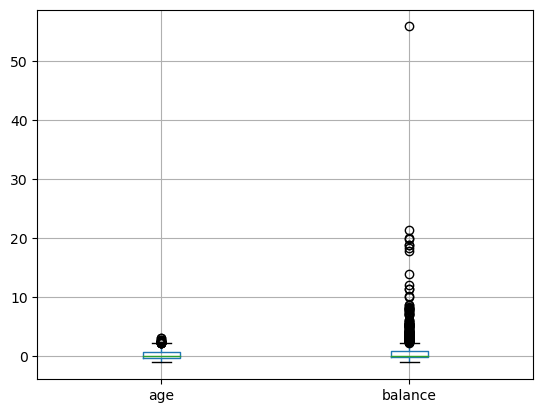

In [16]:
df.boxplot(column=['age','balance'])
plt.show()

Let's also take a look at their histograms after we have rescaled them.

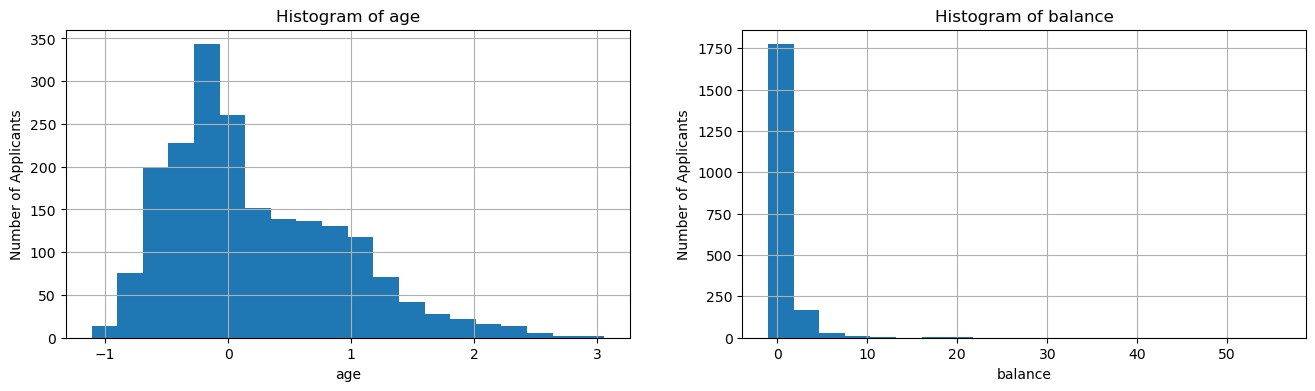

In [17]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot age
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)

# Plot balance
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of balance")
ax3.set_xlabel('balance')
ax3.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

plt.show()

Both histograms are skewed to the left, which is not ideal. Many ML algorithms work best when the features are not skewed to either side.

Finally, before treating the outliers, let's find the minimum values in these columns.

In [18]:
df[['age', 'balance']].min()

age       -1.111111
balance   -1.060984
dtype: float64

Since the extreme values are practically possible in both columns, i.e. some people might have large balance and also older, instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models. A typical way to do this is to apply a log transformation. However, we do have negative values in both columns after rescaling and we need to add a constant to all values in order to shift them to a positive range before applying a log transformation. 

Here we are have chosen to shift the values to the interval $[1, +\infty]$ before applying a log transformation.

In [19]:
# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age']+2.26)
df['balance'] = np.log(df['balance']+2.85)

Let's plot again.

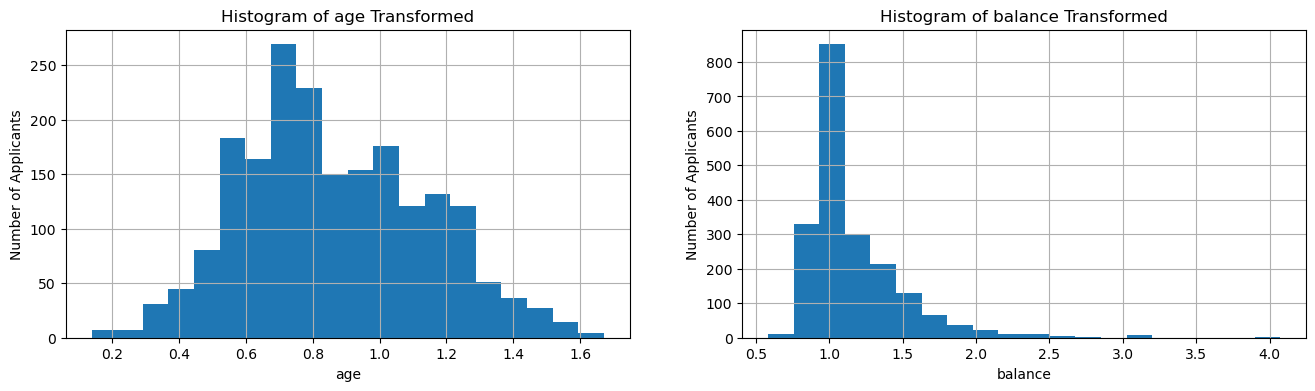

In [20]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot age
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age Transformed")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)

# Plot balance
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of balance Transformed")
ax3.set_xlabel('balance')
ax3.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

plt.show()

The histograms show that the transformed features are less skewed and have distributions closer to normal than the original features `balance` and `age`.

## 5. Creation of Derived Features